In [24]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = None

alias = {
    "energy_based_run.csv": "EnergyBasedController",
    "pure_ppo_eval_200000.csv": "VanillaPPO_undertrained",
    "pure_ppo_eval_500000.csv": "VanillaPPO_welltrained",
    "pure_ppo_with_calfw_eval_200000.csv": "VanillaPPO_undertrained+CALFWrapper",
    "pure_ppo_with_calfw_eval_500000.csv": "VanillaPPO_welltrained+CALFWrapper",
}

for root, dirs, files in os.walk("../logs"):
    for fn in files:
        
        if not fn.endswith(".csv"):
            continue
        file_path = os.path.join(root, fn)

        tmp_df = pd.read_csv(file_path, sep=',')
        
        # Convert string to array
        for k in tmp_df:
            tmp_df[k] = tmp_df[k].apply(lambda x: x if not isinstance(x, str) else np.fromstring(
                                        x.replace('\n','')
                                        .replace('[','')
                                        .replace(']','')
                                        .replace('  ',' '), sep=' '))
            
        tmp_df["action"] = tmp_df["action"].apply(lambda x: x[0])
        tmp_df["reward"] = tmp_df["reward"].apply(lambda x: x[0])
        tmp_df["accumulated_reward"] = tmp_df["accumulated_reward"].apply(lambda x: x[0])

        tmp_df["x"] = tmp_df["state"].apply(lambda x: x[0])
        tmp_df["y"] = tmp_df["state"].apply(lambda x: x[1])
        tmp_df["angular_vel"] = tmp_df["state"].apply(lambda x: x[2])

        tmp_df["Case"] = alias[fn]
        
        if df is None:
            df = tmp_df
        else:
            df = pd.concat([df, tmp_df])

In [26]:
df.columns = ["step"] + df.columns[1:].tolist()


In [27]:
df.groupby(["Case"]).count()

,step,state,action,reward,accumulated_reward,x,y,angular_vel
Case,,,,,,,,
EnergyBasedController,1000,1000,1000,1000,1000,1000,1000,1000
VanillaPPO_undertrained,1000,1000,1000,1000,1000,1000,1000,1000
VanillaPPO_undertrained+CALFWrapper,1000,1000,1000,1000,1000,1000,1000,1000
VanillaPPO_welltrained,1000,1000,1000,1000,1000,1000,1000,1000
VanillaPPO_welltrained+CALFWrapper,1000,1000,1000,1000,1000,1000,1000,1000


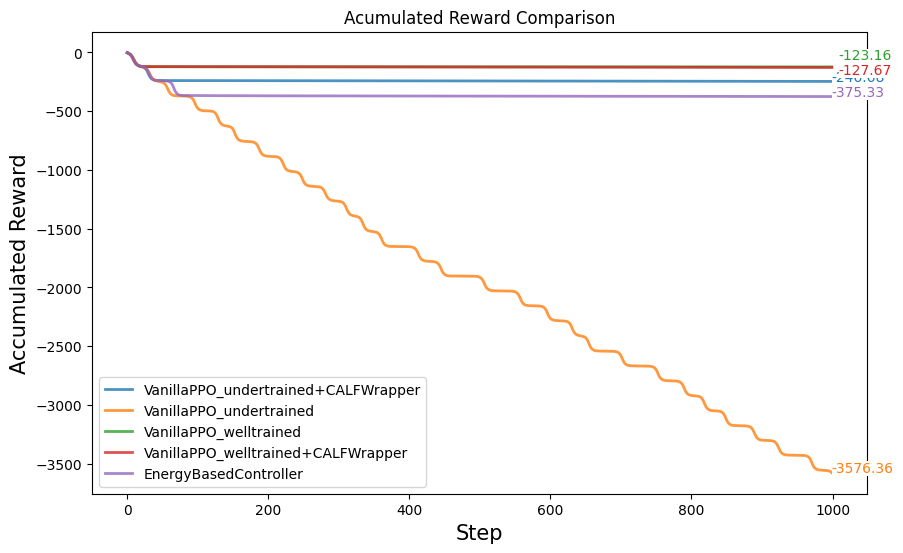

In [28]:
def plot_accum_reward(df, y_label="accumulated_reward"):
    tmp_df = df.set_index(["Case"])
    fig, ax = plt.subplots(figsize=(10, 6))
    for c in df.Case.unique():
        p = tmp_df.loc[c].plot(x="step", y=y_label, ax=ax, label=c, lw=2, alpha=0.8)

        bias = [0, 0]

        if c == "VanillaPPO_welltrained+CALFWrapper":
            bias = [10, -60]
        elif c == "VanillaPPO_welltrained":
            bias = [10, 60]

        current_color = ax.get_lines()[-1].get_color()
        ax.annotate(str(tmp_df.loc[c][y_label].values[-1].round(2)), 
                    (
                        tmp_df.loc[c].step.values[-1] + bias[0], # X
                        tmp_df.loc[c][y_label].values[-1] + bias[1], # Y
                     ),
                     color=current_color,
                     bbox=dict(facecolor='white', edgecolor="None", pad=0.2))

    ax.set_xlabel("Step", fontsize=15)
    ax.set_ylabel("Accumulated Reward", fontsize=15)
    # ax.set_yscale("log")
    ax.legend()
    ax.set_title("Acumulated Reward Comparison")

plot_accum_reward(df, y_label="accumulated_reward")

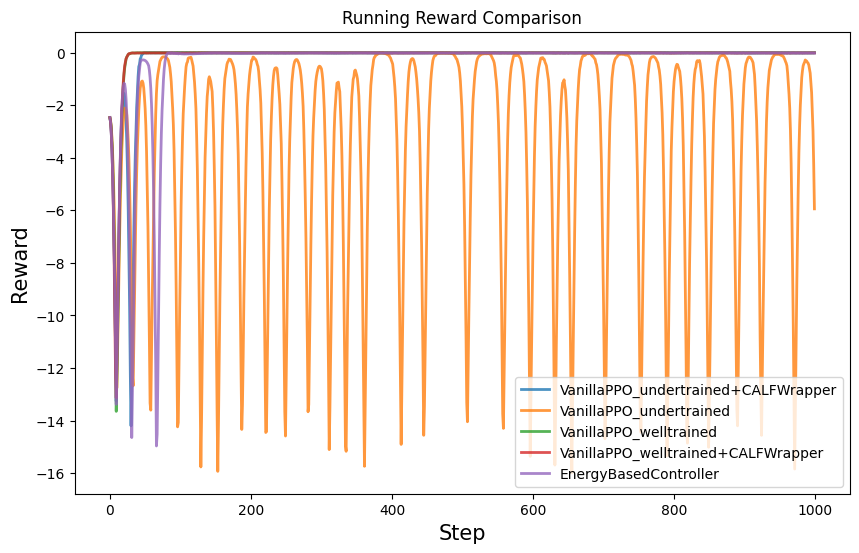

In [29]:
def plot_immediate_reward(df, y_label="accumulated_reward"):
    tmp_df = df.set_index(["Case"])
    fig, ax = plt.subplots(figsize=(10, 6))
    for c in df.Case.unique():
        p = tmp_df.loc[c].plot(x="step", y=y_label, ax=ax, label=c, lw=2, alpha=0.8)

        bias = [0, 0]

        if c == "VanillaPPO_undertrained+CALFWrapper":
            bias = [10, 60]
        elif c == "EnergyBasedController":
            bias = [10, -60]

        current_color = ax.get_lines()[-1].get_color()
        # ax.annotate(str(tmp_df.loc[c][y_label].values[-1].round(2)), 
        #             (
        #                 tmp_df.loc[c].step.values[-1] + bias[0], # X
        #                 tmp_df.loc[c][y_label].values[-1] + bias[1], # Y
        #              ),
        #              color=current_color,
        #              bbox=dict(facecolor='white', edgecolor="None", pad=0.2))

    ax.set_xlabel("Step", fontsize=15)
    ax.set_ylabel("Reward", fontsize=15)
    # ax.set_yscale("log")
    ax.legend()
    ax.set_title("Running Reward Comparison")

plot_immediate_reward(df, y_label="reward")

VanillaPPO_undertrained+CALFWrapper
VanillaPPO_undertrained
VanillaPPO_welltrained
VanillaPPO_welltrained+CALFWrapper
EnergyBasedController


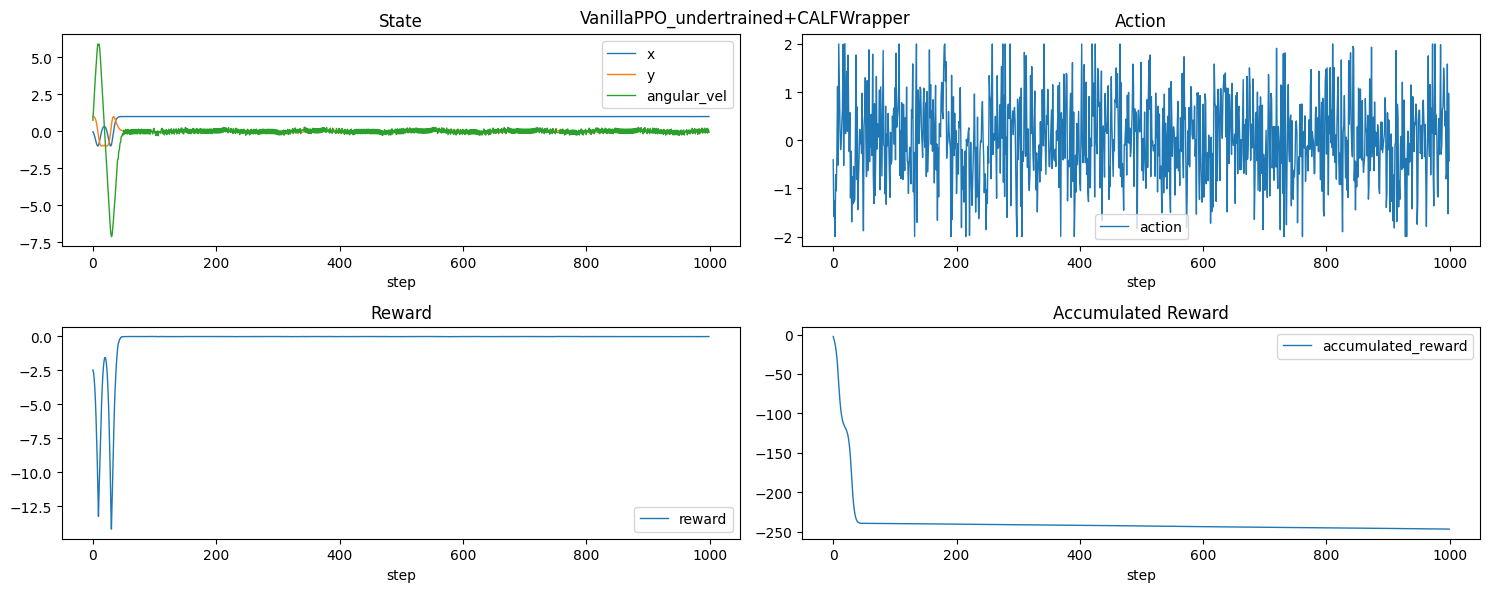

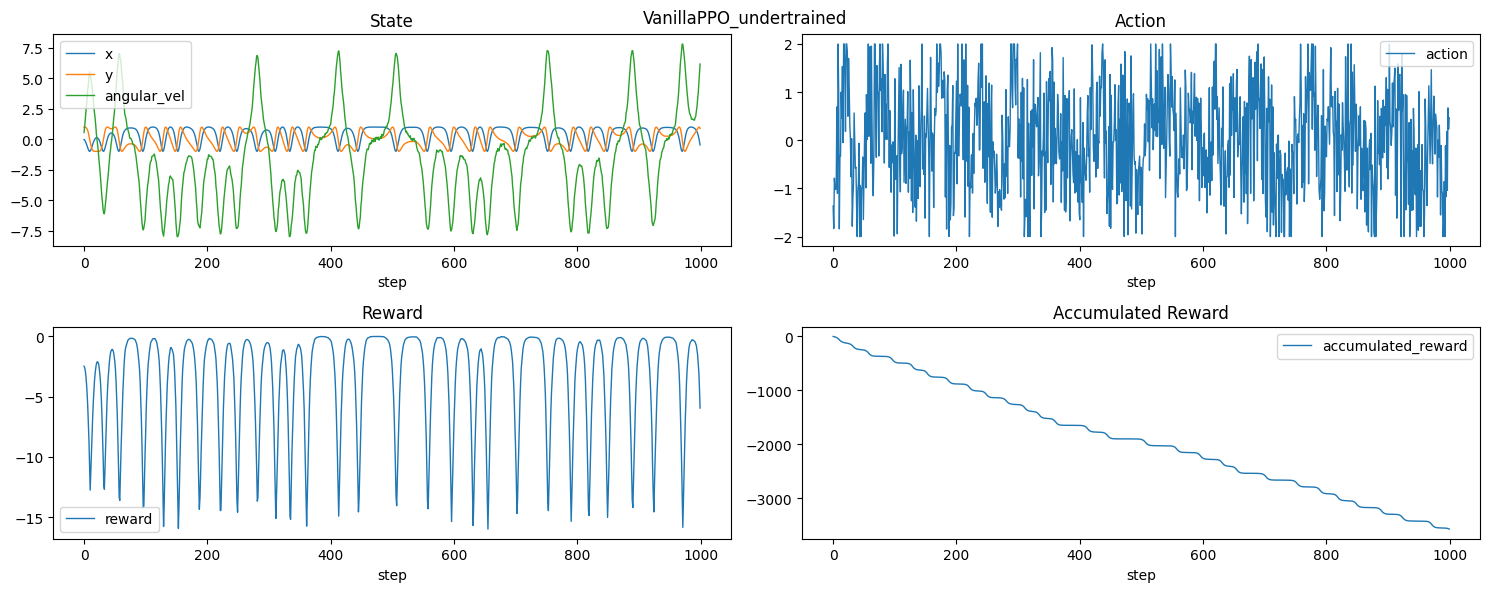

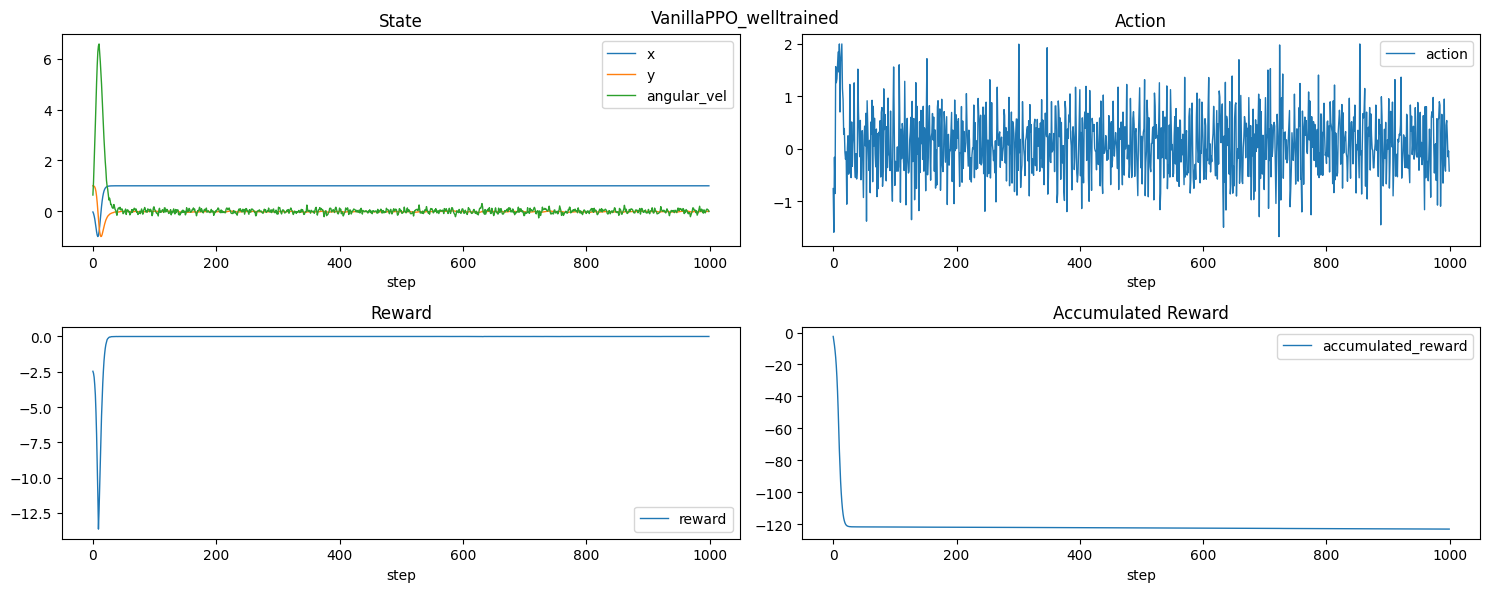

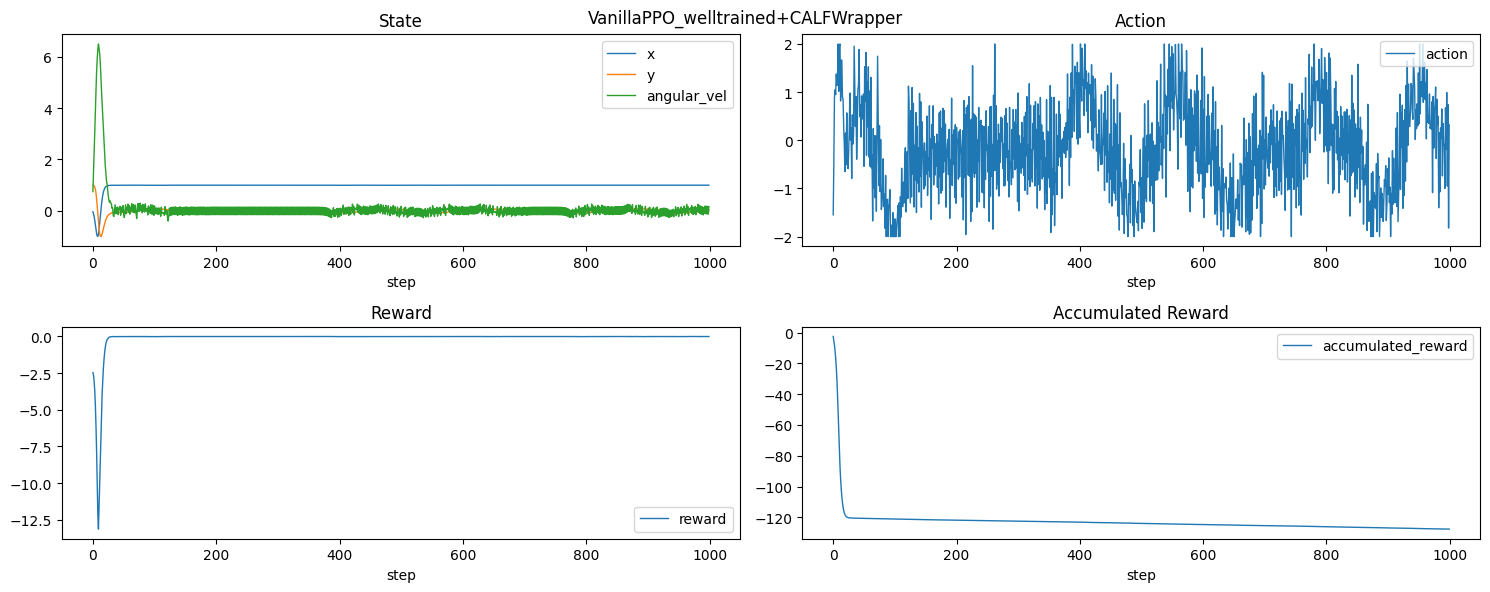

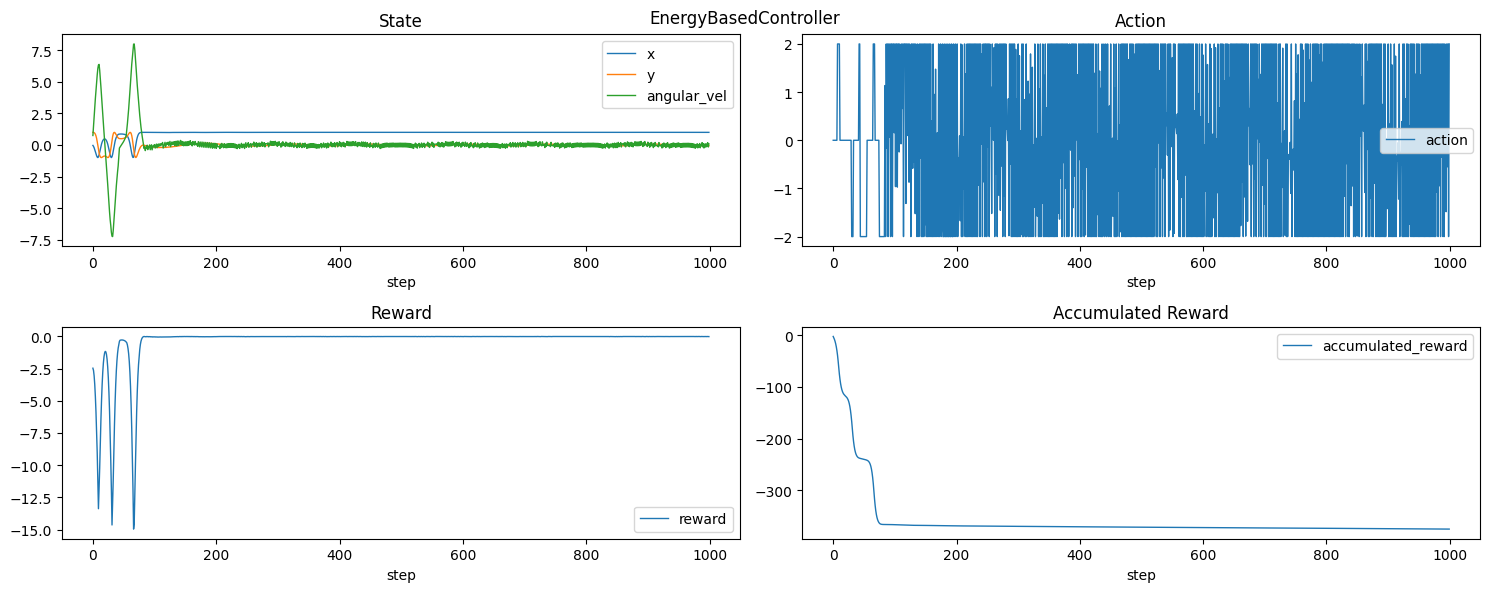

In [30]:
for c in df.Case.unique():
    print(c)

    tmp_df = df.set_index(["Case"])
    fig, ax = plt.subplots(2, 2, figsize=(15, 6))

    tmp_df.loc[c].plot(x="step", y="x", ax=ax[0][0], lw=1)
    tmp_df.loc[c].plot(x="step", y="y", ax=ax[0][0], lw=1)
    tmp_df.loc[c].plot(x="step", y="angular_vel", ax=ax[0][0], lw=1)
    ax[0][0].set_title("State")

    tmp_df.loc[c].plot(x="step", y="action", ax=ax[0][1], lw=1)
    ax[0][1].set_title("Action")

    tmp_df.loc[c].plot(x="step", y="reward", ax=ax[1][0], lw=1)
    ax[1][0].set_title("Reward")

    tmp_df.loc[c].plot(x="step", y="accumulated_reward", ax=ax[1][1], lw=1)
    ax[1][1].set_title("Accumulated Reward")

    # plt.title("VanillaPPO_undertrained+CALFWrapper")
    plt.tight_layout()
    fig.suptitle(c) # or plt.suptitle('Main title')
    fig.savefig("../media/" + c + ".pdf")

    